<a href="https://colab.research.google.com/github/ralph27/Matplotlib-visualization/blob/master/Medical_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Lifecycle
© 2023, Zaka AI, Inc. All Rights Reserved.

---
## Case Study: Insurance Medical Cost Prediction

**Objective:**

In this exercise, you will explore a dataset of insurance data detailed below. We will build a model to predict the cost of treatment for individuals based on their age, sex, bmi and other information.


## Dataset Description


*   **age**: age of primary beneficiary
*   **sex**: insurance contractor gender, female, male
*   **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   **children**: Number of children covered by health insurance / Number of dependents
*   **smoker**: Smoking
*   **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   **charges**: Individual medical costs billed by health insurance

## 1. Data Loading

#### Import necessary python modules

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Load the data

You can find the dataset [here](https://github.com/zaka-ai/medical-cost-prediction).

This is a Github repo where you can store multiple types of files and load them into your virtual disk by cloning the git repo with `!git clone [link to repo]`. From there we can change the working directory to point to the path of the folder where the dataset we want to work on resides.

In [2]:
# clone git repo
!git clone https://github.com/zaka-ai/medical-cost-prediction

# change working directory
%cd medical-cost-prediction/data/

Cloning into 'medical-cost-prediction'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 21 (delta 3), reused 14 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 23.42 KiB | 7.81 MiB/s, done.
Resolving deltas: 100% (3/3), done.
/content/medical-cost-prediction/data


#### Read & visualize data
Data now is stored on disk in a csv (Comma Separated Values) file. To load the data to our code, we use **pandas** module, more specifically, the **read_csv** function.

In [3]:
# read CSV file in Pandas
data = pd.read_csv("insurance.csv")

# display first 10 rows
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## 2. Exploratory Data Analysis

Let's dig deeper & understand our data

**Task:** how many rows & columns in our dataset

In [6]:
# get the number of rows and columns
rows = data.shape[0]
columns = data.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 1338 rows and 7 columns.


Using the function **info()**, we can check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Using the function **describe()**, we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Distribution of charges

First, let's look at the distribution of charges. This will help us to know how much patients spend on treatment on average.

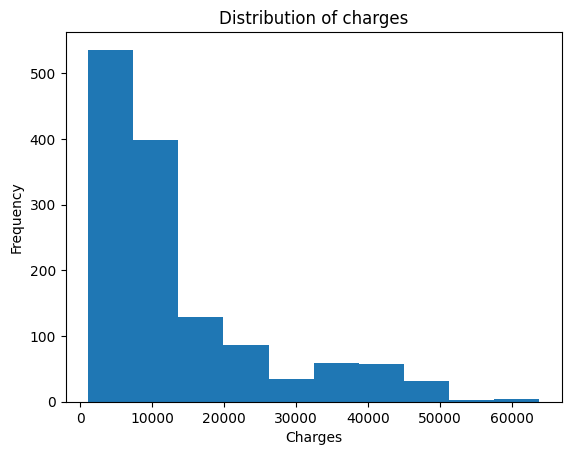

In [9]:
# plot the histogram of the charges
data["charges"].plot(kind='hist')
plt.title("Distribution of charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

#### Correlation between smoking and cost of treatment

Let's see if smokers spend more or less on treatment than non-smokers!

First, let's see how many smokers vs non-smokers we have.

In [10]:
# select smokers
smokers = data[(data.smoker == 'yes')]

# select non smokers
nonsmokers = data[(data.smoker == 'no')]


# print the number of smokers and non-smokers
print('There are {} smokers and {} non-smokers.'.format(smokers.shape[0], nonsmokers.shape[0]))


There are 274 smokers and 1064 non-smokers.


Now let's plot the charges for both.

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

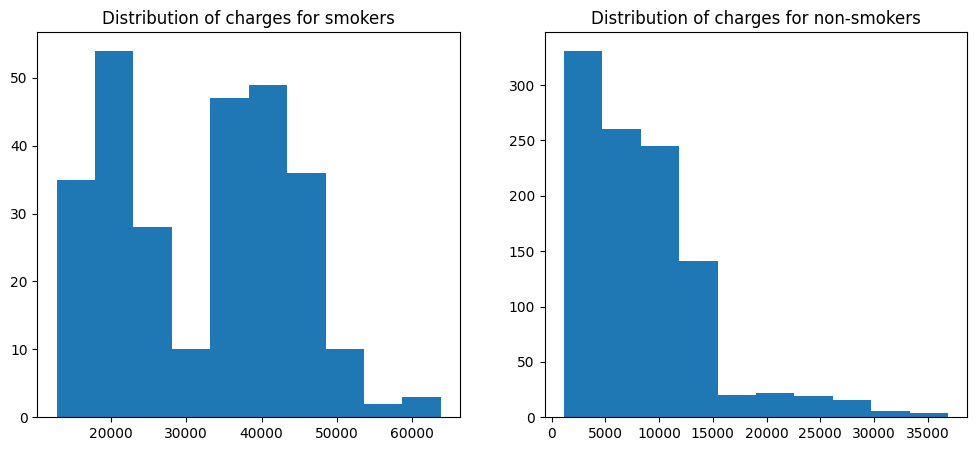

In [11]:
# create the figure
fig = plt.figure(figsize=(12,5))

# add first sub plot for smokers
ax = fig.add_subplot(121)
# draw distribution of charges for smokers
ax.hist(smokers["charges"])
# set sub plot title
ax.set_title('Distribution of charges for smokers')

# add second sub plot for non smokers
ax = fig.add_subplot(122)
# draw distribution of charges for non-smokers
ax.hist(nonsmokers["charges"])
# set sub plot title
ax.set_title('Distribution of charges for non-smokers')

Smoking patients spend more on treatment.

#### Correlation between age and cost of treatment

First, let's look at the distribution of age in our dataset, and then look at how age affects the cost of treatment.

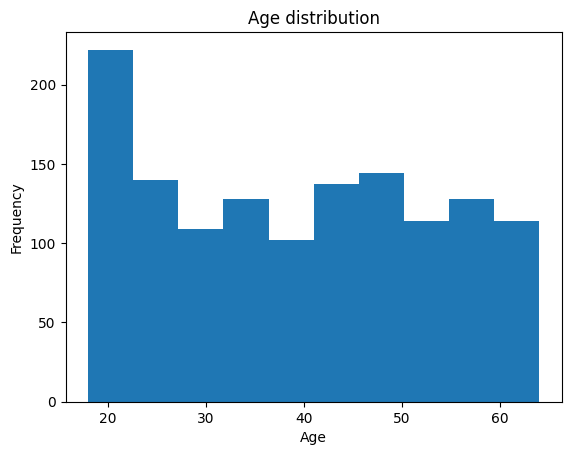

In [12]:
# plot histogram for age distribution
plt.hist(data["age"])
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Let's plot the correlation between age and cost of treatment

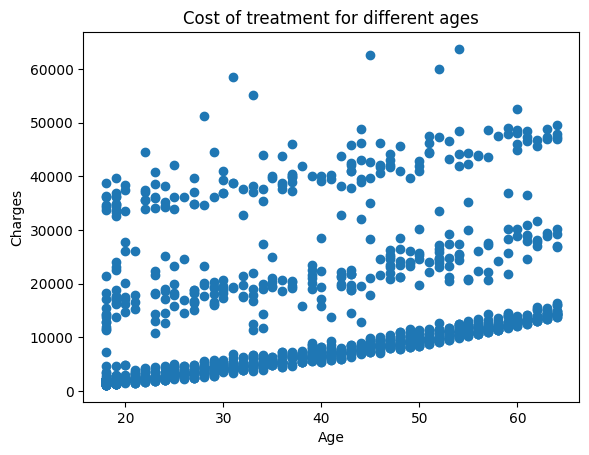

In [13]:
# draw a scatter plot to show correlation between age and charges, color = 'b'
plt.scatter(data["age"], data["charges"])
plt.title("Cost of treatment for different ages")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

Let's check if smoking also affects this curve.

**Task**: show a scatter plot with the correlation between age and cost of treatment while showing smokers in red and non-smokers in blue

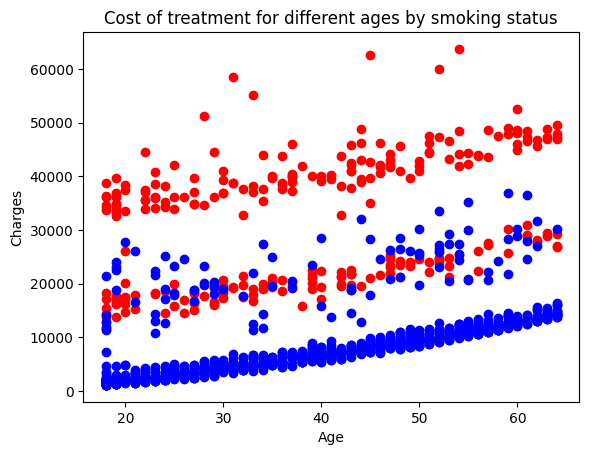

In [15]:
#Exercise
plt.scatter(smokers["age"], smokers["charges"], color='r')
plt.scatter(nonsmokers["age"], nonsmokers["charges"], color='b')
plt.title("Cost of treatment for different ages by smoking status")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

#### Correlation between BMI and cost of treatment

# Body Mass Index

![alt text](https://4.bp.blogspot.com/-nBF9Z1tFGhI/W3MqbdD0j7I/AAAAAAAAAIs/UdyXTIxsBT8Pl8usABxEK_Fusj5S0SnBQCLcBGAs/s1600/HOW%2BTO%2BCALCULATE%2BBODY%2BMASS%2BINDEX%2BBMI.jpg)

# BMI Chart

![BMI char](https://images.squarespace-cdn.com/content/v1/56fae4be1d07c0c393d8faa5/1551103826935-HCXS8U78500C06GQ1PLJ/ke17ZwdGBToddI8pDm48kNMeyc_nGAbaGjp3EBJ2o08UqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYxCRW4BPu10St3TBAUQYVKckzCNDuUMr1wTvf7-fqd2hrX5O2-_PoO3UJ2jNU1VzJbe6G9-F0r9BTATNUu-NBMy/BMI+Chart.jpg)

First, let's look at the distribution of BMI in our dataset, and then look at how it affects the cost of treatment.

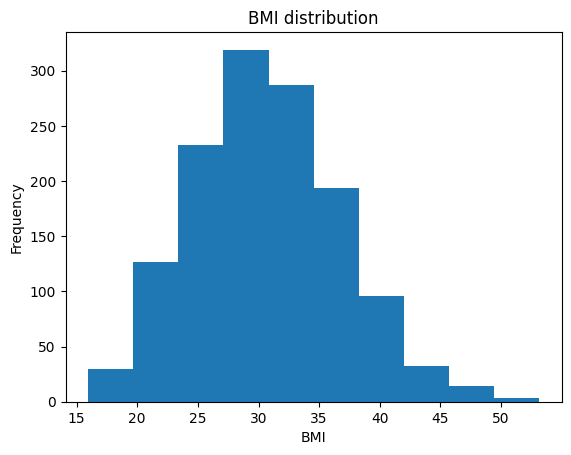

In [16]:
# draw a histogram to show the distribution of BMI
data["bmi"].plot(kind="hist")
plt.title("BMI distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

According to the chart above, obesity starts at BMI = 30. Let's investigate the impact of BMI on cost of treatment.

In [17]:
# select obese people
obese = data[(data["bmi"] >= 30)]
# select overweight people
overweight = data[(data["bmi"] >= 25) & (data["bmi"] < 30)]
# select healthy people
healthy = data[(data["bmi"] < 25) & (data["bmi"] >= 18)]

# print the number of obese, overweight and healthy people

print('There are {} obese, {} overweight and {} healthy individuals.'.format(obese.shape[0], overweight.shape[0], healthy.shape[0]))

There are 705 obese, 385 overweight and 230 healthy individuals.


To compare, let's plot the distribution of charges for all 3 groups (obese, overweight and healthy) in 1 plot, while showing `obese` data in red, `overweight` data in yellow and `healthy` data in green.

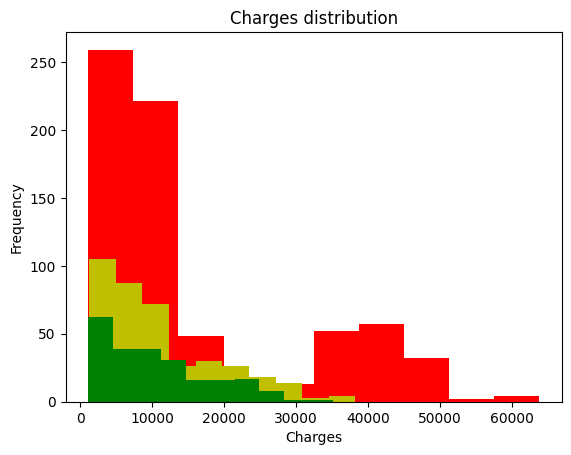

In [18]:
plt.hist(obese["charges"], color='r')
plt.hist(overweight["charges"], color='y')
plt.hist(healthy["charges"], color='g')
plt.title("Charges distribution")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

Patients with BMI above 30 spend more on treatment!

## 3. Data Preprocessing
"Garbage in, garbage out".

Data should be preprocessed and cleaned to get rid of noisy data.
Preprocessing includes:
 - dealing with missing data
   - remove whole rows (if they are not a lot)
   - infer (e.g., date of birth & age)
   - fill with mean, median, or even 0
 - removing unsued column(s)
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)



---



 Let's start by removing missing data.

In [21]:
# print how many missing value in each column
data.isnull().sum()

,0
age,0
sex,0
bmi,3
children,0
smoker,0
region,0
charges,0


In [22]:
# drop rows with missing values
data = data.dropna()
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   int64  
 1   sex       1335 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1335 non-null   int64  
 4   smoker    1335 non-null   object 
 5   region    1335 non-null   object 
 6   charges   1335 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.4+ KB


#### Remove unused columns

Let's remove the `region` column since we don't really care about it

In [24]:
# dropping the region feature
data.drop('region', axis=1, inplace=True)
data.head()

<ipython-input-24-98a51e90536e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('region', axis=1, inplace=True)


,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


#### Convert Categorical columns to numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.


Let's start with the sex column



In [27]:
# define dictionary
gender = {'male':0, 'female':1}
# replace sex column with 0/1
data['sex'] = data['sex'].apply(lambda x: gender[x])
# print head to verify
data.head()

<ipython-input-27-9d1437c2d1f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex'] = data['sex'].apply(lambda x: gender[x])


,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,yes,16884.92400
1,18,0,33.770,1,no,1725.55230
2,28,0,33.000,3,no,4449.46200
3,33,0,22.705,0,no,21984.47061
4,32,0,28.880,0,no,3866.85520


And now the smokers column

In [28]:
# define dictionary
smokers = {'no':0, 'yes':1}
# replace smokers column with 0/1
data['smoker'] = data['smoker'].apply(lambda x: smokers[x])
# print head to verify
data.head()

<ipython-input-28-64dbcf65dc34>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smoker'] = data['smoker'].apply(lambda x: smokers[x])


,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


#### Normalization

Let's scale all the columns by dividing by the maximum

In [29]:
# get the max of each column
data_max = data.max()
data_max

,0
age,64.00000
sex,1.00000
bmi,53.13000
children,5.00000
smoker,1.00000
charges,63770.42801


In [30]:
# divide each column by its maximum value
data = data.div(data_max)
data.describe()

,age,sex,bmi,children,smoker,charges
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,0.612441,0.495131,0.577102,0.219476,0.205243,0.208299
std,0.219491,0.500164,0.114832,0.241145,0.404031,0.190041
min,0.281250,0.000000,0.300395,0.000000,0.000000,0.017592
25%,0.421875,0.000000,0.495059,0.000000,0.000000,0.074365
50%,0.609375,0.000000,0.572181,0.200000,0.000000,0.147187
75%,0.796875,1.000000,0.652880,0.400000,0.000000,0.262144
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. Model Training & Testing



#### Data split

Before training, we need to split data into training (80%) & testing (20%)

In [35]:
# store all columns excpet last one as inputs in X
X = data.iloc[:,0:-1].values
# store the last column as the output (label) in y
y = data.iloc[:,-1].values

# split dataset in a 80/20 split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1068, 5) (1068,)
(267, 5) (267,)


#### Linear Regression Modeling


In [36]:
# define our regression model
model = LinearRegression()

# train our model
model.fit(x_train, y_train)
print('Model trained!')

Model trained!


#### Evaluation

In [37]:
print('Model score {}'.format(model.score(x_test, y_test)))

Model score 0.8043792068989463


####Prediction
Let's have some fun with some predictions

In [39]:
# use the linear model to predict
print(f"The charges for someone who is {x_train[0][0]*data_max[0]} years old, {x_train[0][1]*data_max[1]} m(0)/f(1), with a bmi of {x_train[0][2]*data_max[2]} and, {x_train[0][3]*data_max[3]} children, {x_train[0][4]*data_max[4]} sm(1)/n_sm(0), is around {model.predict([x_train[0]])*data_max[-1]}")

The charges for someone who is 47.0 years old, 1.0 m(0)/f(1), with a bmi of 24.32 and, 0.0 children, 0.0 sm(1)/n_sm(0), is around [8171.17184965]


<ipython-input-39-13d380f17cc6>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"The charges for someone who is {x_train[0][0]*data_max[0]} years old, {x_train[0][1]*data_max[1]} m(0)/f(1), with a bmi of {x_train[0][2]*data_max[2]} and, {x_train[0][3]*data_max[3]} children, {x_train[0][4]*data_max[4]} sm(1)/n_sm(0), is around {model.predict([x_train[0]])*data_max[-1]}")
<ipython-input-39-13d380f17cc6>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"The charges for someone who is {x_train[0][0]*data_max[0]} years old, {x_train[0][1]*data_max[1]} m(0)/f(1), with a bmi of {x_train[0][2]*data_max[2]} and

#### BONUS: Features Importance (weights)


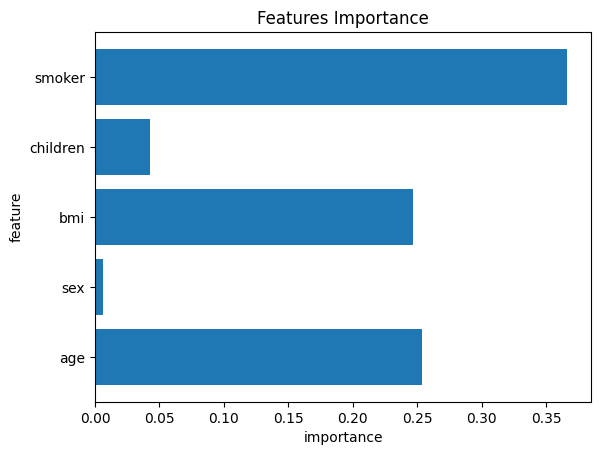

In [40]:
columns_names = data.columns[0:-1].values
features_importance = model.coef_
plt.barh(columns_names, features_importance)
plt.title('Features Importance')
plt.xlabel('importance')
plt.ylabel('feature')
plt.show()